<a href="https://colab.research.google.com/github/CLAUDERNORONHA/LIMPEZA-DADOS/blob/master/LIMPEZA_DE_DADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts

In [ ]:
dados = pd.read_csv('/content/drive/My, sep=';')

In [ ]:
dados.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:

dados.shape

(999, 12)

In [ ]:
#Vamos colocar os nomes nas colunas 

dados.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]

In [ ]:
dados.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
#Explorar os dados categoricos 

agrupado = dados.groupby(['Estado']).size()

agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

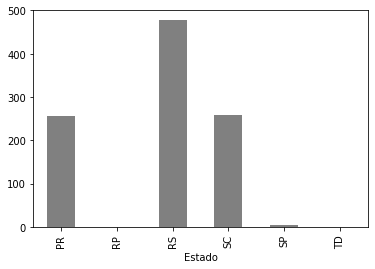

In [ ]:
agrupado.plot.bar(color='gray')
plt.show()

In [ ]:
#Explorar as colunasnumericas

dados['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

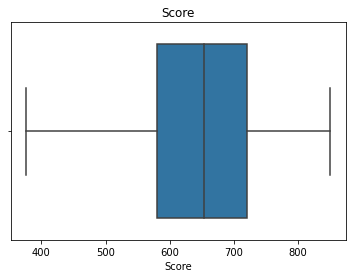

In [ ]:
sns.boxplot(dados['Score']).set_title('Score')
plt.show()

In [ ]:
#Genero

sexo = dados.groupby(['Genero']).size()
sexo

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

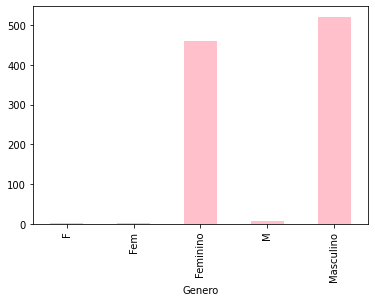

In [ ]:
sexo.plot.bar(color='pink')
plt.show()

Explorar colunas numericas

In [ ]:
#Score

dados['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

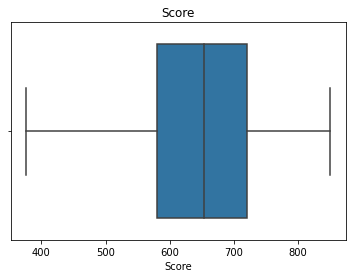

In [ ]:
sns.boxplot(dados['Score']).set_title('Score')
plt.show()

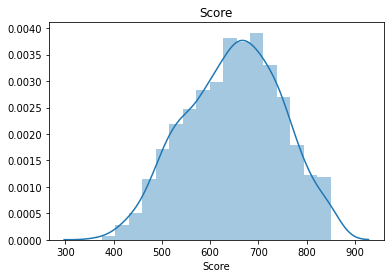

In [ ]:
sns.distplot(dados['Score']).set_title('Score')
plt.show()

In [ ]:
#Idade

dados['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

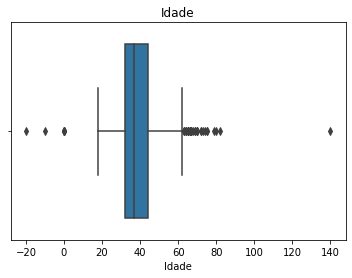

In [ ]:
sns.boxplot(dados['Idade']).set_title('Idade')
plt.show()

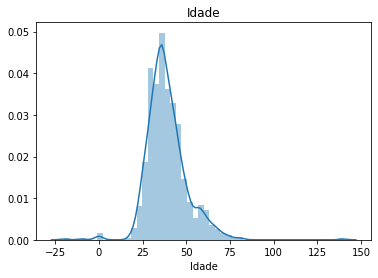

In [ ]:
#Gerar um histograma

sns.distplot(dados['Idade']).set_title('Idade')
plt.show()

In [ ]:
#SAldo

dados['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

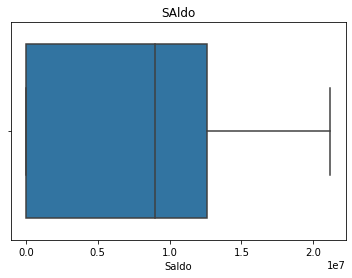

In [ ]:
sns.boxplot(dados['Saldo']).set_title('SAldo')
plt.show()

Text(0.5, 1.0, 'SAldo')

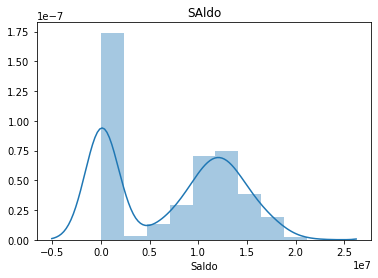

In [ ]:
sns.distplot(dados['Saldo']).set_title('SAldo')

In [ ]:
#Salario

dados['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

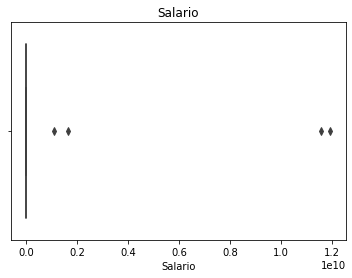

In [ ]:
sns.boxplot(dados['Salario']).set_title('Salario')

Text(0.5, 1.0, 'Salario')

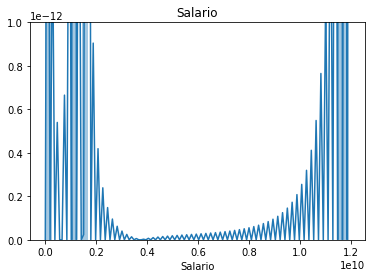

In [ ]:
sns.distplot(dados['Salario']).set_title('Salario')

In [ ]:
#Valores nulos 

dados.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [ ]:
#Salarios
#remover NAS e substituir pela mediana 

#tirar a mediana do salario

#dados['Salario'].median()

mediana = sts.median(dados['Salario'])
mediana

70518.0

In [ ]:
#Agora vou substituir os NAS pela median

dados['Salario'].fillna(mediana, inplace=True)

In [ ]:
dados['Salario'].isnull().sum()

0

In [ ]:
#Genero, falta de padronização 

agrupado = dados.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [ ]:
#Vamos preencher os valores faltantes pelo masculino, porque é o que mais tem no grupo, 
#Pelo motivo da Moda. 

#Quantidade de valores nulos 
dados['Genero'].isnull().sum()

8

In [ ]:
#Preencher NAS com masculino(MODA)

dados['Genero'].fillna('Masculino', inplace=True)

In [ ]:
#Vamos verificar, se teve a mudança 

dados['Genero'].isnull().sum()

0

In [ ]:
#padroniza de acordo com o dominio
dados.loc[dados['Genero'] ==  'M', 'Genero'] = "Masculino"
dados.loc[dados['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino"
#visualiza o resultado
agrupado = dados.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [ ]:
dados['Genero'].isnull().sum()

0

In [ ]:
#Idade fora do dominio

dados['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [ ]:
# Temos na idade alguns problemas, um deles é a idade maxima de 140 é idade minima -20



In [ ]:
dados.loc[(dados['Idade'] < 0 ) | (dados['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [ ]:
# vamos calcular a mediana 

mediana = sts.median(dados['Idade'])
mediana

37

In [ ]:
# Agora vamos substituir os valores excrepantes

dados.loc[(dados['Idade'] < 0 ) | (dados['Idade'] > 120), 'Idade']=mediana

In [ ]:
#Agora vamos visualizar , se teve a mudança

dados.loc[(dados['Idade'] < 0) | (dados['Idade'] > 120)]


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
#Agora vamos tirar os dados Duplicados, buscado pelo ID

dados[dados.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [ ]:
# Agora vamos excluir

dados.drop_duplicates(subset="Id", keep='first', inplace=True)

In [ ]:
#Buscar dados duplicados

dados[dados.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
#Estado fora do dominio 

agrupado = dados.groupby(['Estado']).size()
agrupado 

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64